<a href="https://colab.research.google.com/github/johntango/UniversalFuncApprox/blob/main/UniversalFuncApprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [100/1000], Loss: 0.0741
Epoch [200/1000], Loss: 0.0092
Epoch [300/1000], Loss: 0.0018
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Model saved as simple_nn_model.pth


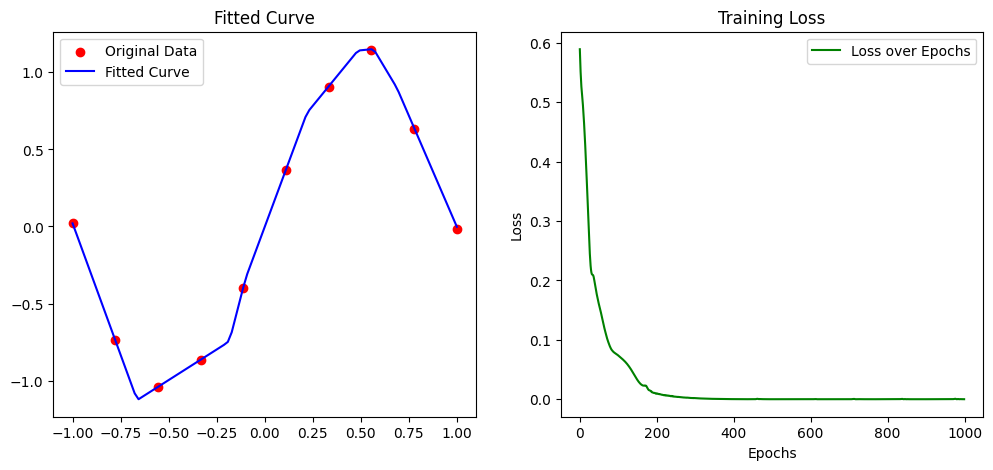

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Input layer to hidden layer
        self.fc2 = nn.Linear(10, 10)  # Hidden layer
        self.fc3 = nn.Linear(10, 1)   # Hidden layer to output

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the network, define loss and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Generate some sample data (10 points)
x_data = torch.linspace(-1, 1, 10).view(-1, 1)  # 10 x-values
y_data = torch.sin(np.pi * x_data) + 0.1 * torch.randn_like(x_data)  # Noisy sine wave



In [ ]:

# Training loop
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_data)
    loss = criterion(outputs, y_data)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'simple_nn_model.pth')
print('Model saved as simple_nn_model.pth')


In [ ]:
# Plot results
x_test = torch.linspace(-1, 1, 100).view(-1, 1)  # Test points
with torch.no_grad():
    y_pred = model(x_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_data.numpy(), y_data.numpy(), label='Original Data', color='red')
plt.plot(x_test.numpy(), y_pred.numpy(), label='Fitted Curve', color='blue')
plt.legend()
plt.title('Fitted Curve')

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), losses, label='Loss over Epochs', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.show()